In [2]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
os.chdir("../../scripts")
from clustering_operations import *

%load_ext autoreload
%autoreload 2

In [5]:
file = "../data/shapefiles/FAPAN_level_06/FAPAN_level_06_inclusive.shp"    

# open file
shp = gpd.read_file(file)
df = pd.read_csv("../data/FAPAN_level_06.csv")

In [6]:
df

,HYBAS_ID,SUBIDs,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,2060000010,9000340.0,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2060000020,"9713800.0,9714060.0,9713811.0,9000340.0,900034...",-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2060000030,"9714184.0,9714057.0,9714060.0,9713809.0,971381...",-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2060000240,"9714184.0,9705993.0,9750034.0,9750038.0,975004...",-0.730333,0.179333,-0.258333,-0.735667,-0.692333,-0.692333,-0.807667,-0.869000,...,0.519000,-0.272333,-0.565667,0.998000,1.364667,0.942000,1.723667,0.914667,0.618000,0.479000
4,2060000250,"9749765.0,9000255.0,9750185.0,9750124.0,974983...",-0.614290,-0.060916,-0.248174,-0.452101,0.300339,0.365251,0.210222,-0.174209,...,0.773108,-0.584944,-0.921383,0.464545,0.500429,0.367784,0.946885,0.401800,0.514194,0.856134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2060092010,"9715271.0,9715561.0,9715378.0,9621913.0,962188...",-1.266984,-0.402407,0.246860,-0.968145,-0.889234,-0.976834,-0.282428,0.005213,...,1.196343,2.081929,2.179278,1.467632,1.385749,1.552513,1.542264,0.633726,0.343541,0.027508
1137,2060092270,"9611011.0,9613316.0,9611751.0,9611144.0,960004...",NaN,-0.426679,-0.742938,-1.043034,-0.153266,0.358655,0.742224,0.404773,...,1.162815,2.146831,1.421175,0.397978,0.230910,0.246707,0.212096,-0.223821,-0.091519,-0.066685
1138,2060094250,"9613251.0,9611780.0,9613285.0,9621412.0,961332...",NaN,-0.021003,-0.632027,-0.614189,0.204217,-0.070974,-0.368166,-0.578827,...,2.036412,1.856630,1.045659,0.977311,1.715401,2.171822,1.829746,1.527238,0.846560,0.997440
1139,2060099470,"9715425.0,9621857.0,9714987.0,9715442.0,971557...",-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820


In [7]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(140, 16)

In [8]:
df = df.drop("SUBIDs", axis=1)
df = df.rename(columns={"HYBAS_ID" : "SUBID"})
shp = shp.rename(columns={"HYBAS_ID" : "SUBID"})
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2060000010,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2060000020,-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,-1.246925,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2060000030,-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,-1.442330,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2060000240,-0.730333,0.179333,-0.258333,-0.735667,-0.692333,-0.692333,-0.807667,-0.869000,-1.366000,...,0.519000,-0.272333,-0.565667,0.998000,1.364667,0.942000,1.723667,0.914667,0.618000,0.479000
4,2060000250,-0.614290,-0.060916,-0.248174,-0.452101,0.300339,0.365251,0.210222,-0.174209,-0.475216,...,0.773108,-0.584944,-0.921383,0.464545,0.500429,0.367784,0.946885,0.401800,0.514194,0.856134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2060092010,-1.266984,-0.402407,0.246860,-0.968145,-0.889234,-0.976834,-0.282428,0.005213,0.506018,...,1.196343,2.081929,2.179278,1.467632,1.385749,1.552513,1.542264,0.633726,0.343541,0.027508
1137,2060092270,NaN,-0.426679,-0.742938,-1.043034,-0.153266,0.358655,0.742224,0.404773,0.401854,...,1.162815,2.146831,1.421175,0.397978,0.230910,0.246707,0.212096,-0.223821,-0.091519,-0.066685
1138,2060094250,NaN,-0.021003,-0.632027,-0.614189,0.204217,-0.070974,-0.368166,-0.578827,-0.350964,...,2.036412,1.856630,1.045659,0.977311,1.715401,2.171822,1.829746,1.527238,0.846560,0.997440
1139,2060099470,-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,0.268928,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820


<AxesSubplot:>

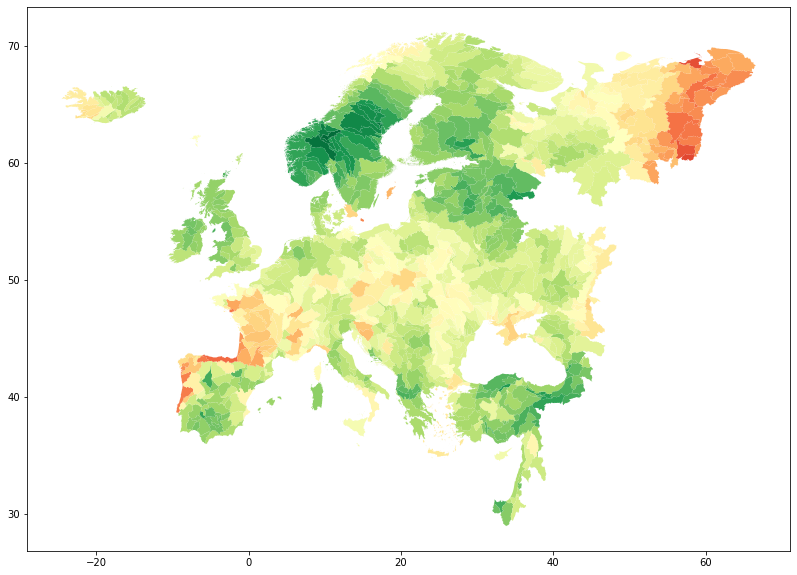

In [9]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn')

In [10]:
# Calculate centroids
shp['centroid'] = shp['geometry'].centroid

# Extract latitude and longitude
shp['LATITUDE'] = shp['centroid'].apply(lambda centroid: centroid.y)
shp['LONGITUDE'] = shp['centroid'].apply(lambda centroid: centroid.x)

# Drop the 'centroid' column if needed
shp = shp.drop('centroid', axis=1)

/var/folders/6b/j2xt7shx2fq5nt2p9y46s3lh0000gn/T/ipykernel_39646/1722491891.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['centroid'] = shp['geometry'].centroid


In [11]:
df.insert(1, 'x', shp['LONGITUDE'])
#df['x'] = df['x'].astype(float)
df.insert(2, 'y', shp['LATITUDE'])
#df['y'] = df['y'].astype(float)

In [12]:
df.shape

(1141, 207)

In [13]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [14]:
df_august = select_columns_by_months(df, [8])
df_august.shape

(1141, 20)

In [15]:
df_august_noNA = df_august.dropna()
df_august_noNA = df_august_noNA.reset_index(drop=True)
df_august_noNA.shape

(1139, 20)

In [16]:
shp_august_noNA = shp[shp['SUBID'].isin(df_august_noNA['SUBID'])]
shp_august_noNA = shp_august_noNA.reset_index(drop=True)
shp_august_noNA.shape

(1139, 18)

In [17]:
df_august_noNA

,SUBID,x,y,8,20,32,44,56,68,80,92,104,116,128,140,152,164,176,188,200
0,2060000010,32.296479,31.271897,-1.687005,-1.592269,-0.841407,-0.429750,-0.266884,-0.130311,0.322720,0.148163,-0.012349,0.714186,0.607188,0.763578,0.840773,0.981499,1.250072,1.320623,1.228164
1,2060000020,32.510856,30.455109,-1.531854,-1.197435,-0.516013,-0.158434,-0.013339,0.293185,0.289346,0.121995,-0.248463,0.805438,0.833308,0.850279,0.979692,0.862096,0.493823,0.101583,-0.147517
2,2060000030,33.063032,30.808122,-1.620268,-1.540479,-0.744793,-0.428128,-0.228600,-0.108894,0.234720,0.087788,-0.085651,0.758942,0.620076,0.708797,0.888112,1.332343,0.922608,1.174539,0.869266
3,2060000240,33.927702,30.097298,-0.869000,-0.831667,-0.848333,0.053000,-0.301333,-0.142667,-0.673000,-0.831667,-0.301333,-0.673000,0.211333,0.386333,0.758000,2.470000,1.977333,1.818667,0.942000
4,2060000250,34.240206,31.148776,-0.174209,-0.216162,-0.500267,0.060472,-0.411005,-0.066669,-0.649397,-0.768524,-0.967161,-0.782374,0.151465,-0.120841,0.095306,2.809839,1.224238,1.070481,0.367784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,2060092010,31.548196,37.355199,0.005213,-0.468901,-0.144710,-0.881318,-0.855902,-1.253244,-1.162967,-0.092555,-0.007702,1.276356,1.297846,-0.226429,0.696710,0.459375,1.074424,1.641538,1.552513
1135,2060092270,32.864366,39.234376,0.404773,-0.426581,-0.498050,-0.301033,-0.552615,-1.009201,-1.150250,0.010950,0.030022,1.644987,1.510369,-0.543074,-0.280272,1.911298,-0.217745,0.443783,0.246707
1136,2060094250,33.446479,37.919047,-0.578827,-0.662478,-0.794798,-0.857102,-0.936942,-0.988670,-1.209620,0.014085,0.194815,0.582549,0.787639,0.123578,0.398923,1.943953,1.049008,1.565387,2.171822
1137,2060099470,32.032950,37.074366,0.100777,-0.453272,-0.464238,-0.964030,-0.909491,-1.101425,-1.129313,0.124041,-0.243522,1.371384,1.355492,0.044738,0.827649,0.631294,0.873490,1.300537,1.080092


100%|██████████| 17/17 [01:09<00:00,  4.06s/it]

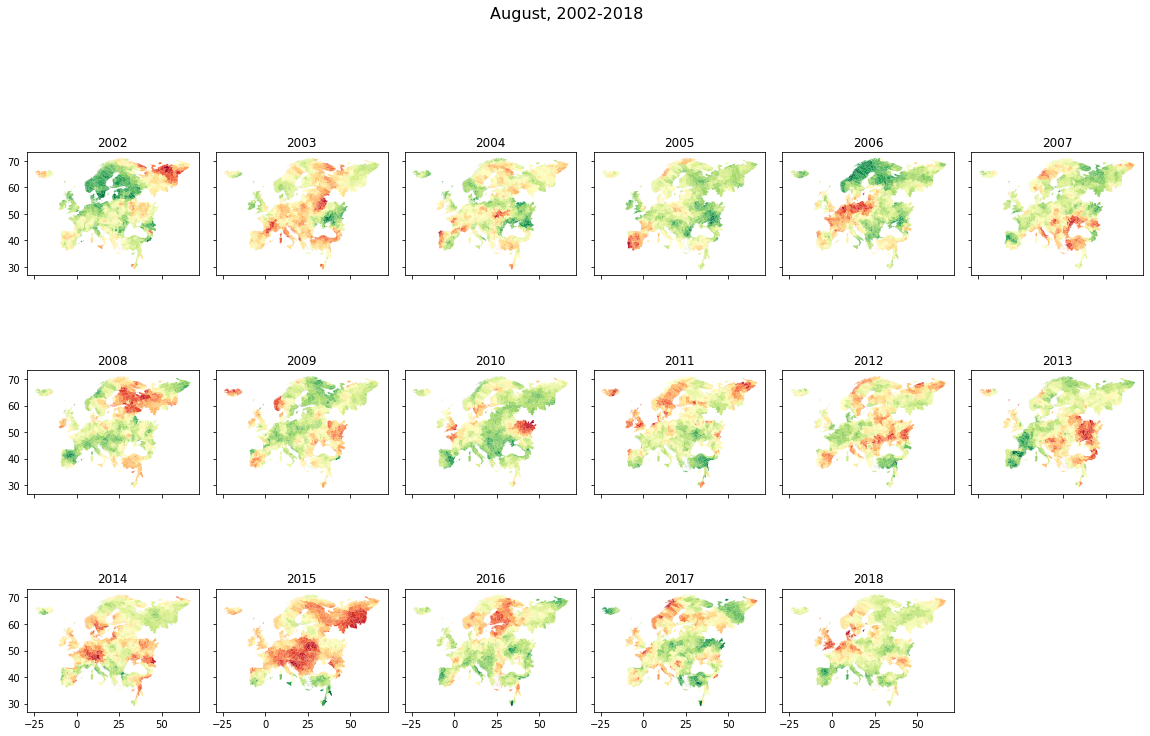

In [16]:
fig, axs = plt.subplots(3, 6, figsize=(20, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.15, 'wspace' : 0.10})
fig.suptitle('August, 2002-2018', fontsize=16)

progress_bar = tqdm(total=17, position=0, leave=True, smoothing=0)

k=0
for i in range(2):
    for j in range(6):
        shp_august_noNA.plot(column=df_august_noNA.iloc[:, 3+k], ax=axs[i][j], cmap='RdYlGn')
        axs[i][j].set_title(f'{2002+k}', fontsize=12)
        k += 1
        progress_bar.update(1)
for j in range(5):
    shp_august_noNA.plot(column=df_august_noNA.iloc[:, 3+k], ax=axs[2][j], cmap='RdYlGn')
    axs[2][j].set_title(f'{2002+k}', fontsize=12)
    k += 1
    progress_bar.update(1)

plt.subplots_adjust(top=0.85)

fig.delaxes(axs[2,5])
#plt.savefig(fname='availability_each_month.png')
plt.show()


## Compute neighbours

In [18]:
# add neighbours column
shp_august_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_august_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_august_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp_august_noNA[~shp_august_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp_august_noNA.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

 99%|█████████▉| 1131/1139 [00:39<00:00, 28.77it/s]

In [19]:
# Create a set to store unique pairs
unique_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_august_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        unique_pairs.add(pair)

In [20]:
neighbours = []
progress_bar = tqdm(total=len(unique_pairs), position=0, leave=True, smoothing=0)

for couple in unique_pairs:
    subid_x_y = [f"{df_august_noNA.loc[df_august_noNA['SUBID'] == subid, 'x'].values[0]}_{df_august_noNA.loc[df_august_noNA['SUBID'] == subid, 'y'].values[0]}" for subid in couple]
    neighbours.append(tuple(subid_x_y))
    
    progress_bar.update(1)

100%|██████████| 1139/1139 [00:40<00:00, 28.42it/s]


100%|█████████▉| 2966/2967 [00:05<00:00, 574.86it/s]

In [21]:
df_without_neighbours = shp_august_noNA[shp_august_noNA["NEIGHBOURS"].apply(len)==0][["LATITUDE", "LONGITUDE"]]
without_neighbours = ['{}_{}'.format(row['LONGITUDE'], row['LATITUDE']) for index, row in df_without_neighbours.iterrows()]

## Compute and visualize clusterings

In [22]:
df = df_august_noNA.copy()

transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[1, i]) + '_' + str(transposed_df.iloc[2, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1, 2], inplace=True)
df.reset_index(drop=True, inplace=True)

In [23]:
df = df.astype(float)

In [24]:
df.head()

,32.296478798287545_31.27189666211486,32.510855866130946_30.45510876556893,33.06303203853544_30.808121855442963,33.927701730531616_30.097297652683793,34.24020640768035_31.14877584408459,34.784029242235405_31.209245849757856,35.55253354166544_33.56197068852566,36.643053915443566_35.40085416038317,36.14962977322427_36.571555633441534,35.92855047729356_36.873856888254416,...,30.17819726105111_37.71678874502663,35.21959615963677_38.28861402102067,21.022148007365395_40.91609798923129,18.49508745708962_42.84841122228151,33.75934632721296_37.835943186536575,31.54819552953363_37.35519859306083,32.864366027697194_39.23437602091948,33.44647882163208_37.919046887330445,32.03295006777807_37.07436560514042,3.199073295906771_44.322404911439584
0,-1.687005,-1.531854,-1.620268,-0.869000,-0.174209,0.098456,0.038589,-0.001214,0.418202,0.244774,...,-0.430273,0.180255,-0.847730,0.006737,-0.571327,0.005213,0.404773,-0.578827,0.100777,-0.393404
1,-1.592269,-1.197435,-1.540479,-0.831667,-0.216162,0.074319,0.053977,0.153245,0.128676,0.060742,...,-0.264680,-0.501362,-0.347586,-0.593310,-0.559307,-0.468901,-0.426581,-0.662478,-0.453272,-1.523004
2,-0.841407,-0.516013,-0.744793,-0.848333,-0.500267,-0.276232,-0.227804,0.056368,-0.278605,-0.497963,...,-0.430501,-0.336567,0.245562,0.115986,-0.902608,-0.144710,-0.498050,-0.794798,-0.464238,-1.114984
3,-0.429750,-0.158434,-0.428128,0.053000,0.060472,0.137160,-0.062607,0.072255,-0.278393,0.135251,...,-0.788161,-0.585464,-0.379348,0.417403,-0.961788,-0.881318,-0.301033,-0.857102,-0.964030,-1.564376
4,-0.266884,-0.013339,-0.228600,-0.301333,-0.411005,-0.196898,-0.257027,-0.440946,-0.875272,-0.482078,...,-0.504927,-1.020822,0.639945,-0.428019,-0.780699,-0.855902,-0.552615,-0.936942,-0.909491,-0.639414


df['13.9024_58.1193'] CONTIENE IL DUPLICATO

In [25]:
#df = df.loc[:,~df.columns.duplicated()]

In [26]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()
    #shp = shp.drop("ClusterID", axis=1)
    #shp["CLUSTERID"] = 0  

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    clusterid = 0
    for cluster in clusters:
        for coordinate in cluster:
            coordinate = coordinate.split('_')
            shp.loc[((shp['LONGITUDE'] == float(coordinate[0])) & (shp['LATITUDE'] == float(coordinate[1]))), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    seed_value = 45
    np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [25]:
clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.8)

Computing neighbours strengths...


  0%|          | 0/2967 [00:00<?, ?it/s]

100%|██████████| 2967/2967 [00:00<00:00, 4387.62it/s]


Neighbours strengths computed.
Computing clusters...


1262it [00:20, 63.03it/s]                         s]

Clusters computed.


No. clusters (w/o singletons) = 100
No. singletons = 60


100%|██████████| 1139/1139 [00:03<00:00, 341.50it/s] 


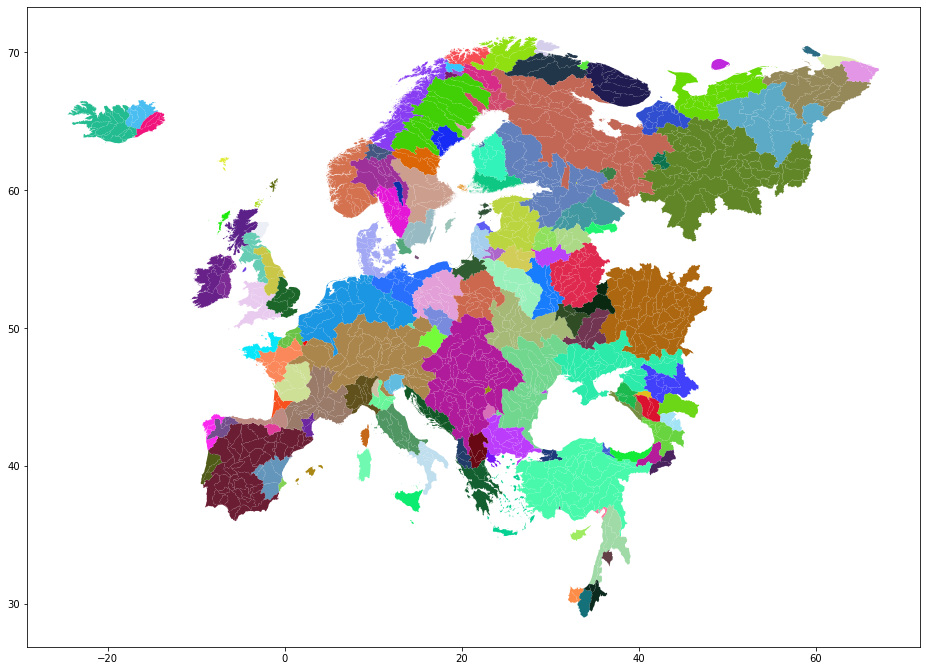

In [26]:
plot_clusters_shp(shp_august_noNA, clusters_corr08, figsize=(16,16))

In [27]:
clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.85)

Computing neighbours strengths...


  0%|          | 0/2967 [00:00<?, ?it/s]

100%|██████████| 2967/2967 [00:00<00:00, 5170.30it/s]


Neighbours strengths computed.
Computing clusters...


1382it [00:18, 75.99it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 146
No. singletons = 97


100%|██████████| 1139/1139 [00:03<00:00, 322.05it/s]


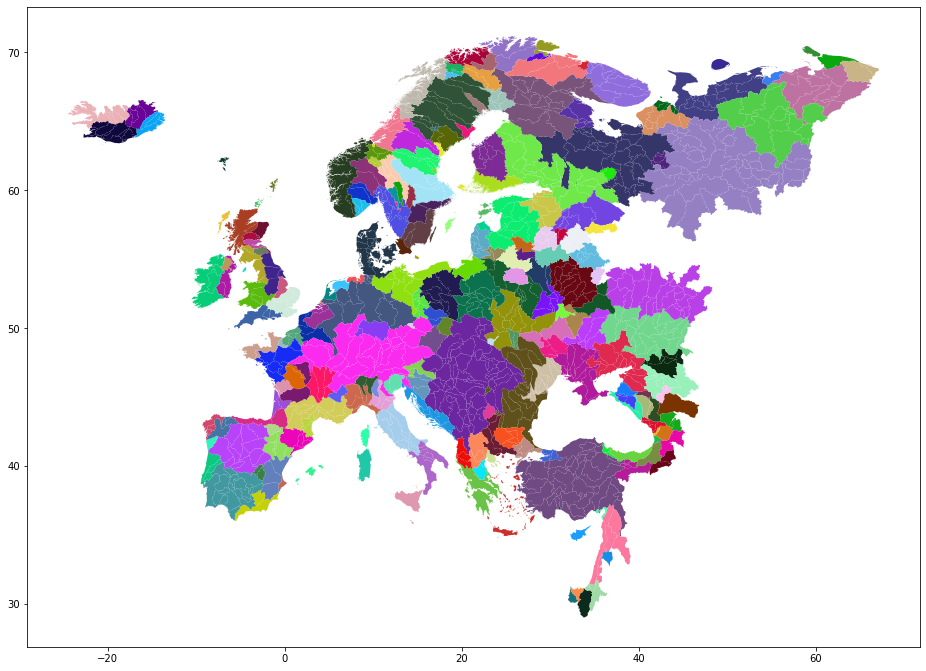

In [28]:
plot_clusters_shp(shp_august_noNA, clusters_corr085, figsize=(16,16))

In [29]:
clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 2967/2967 [00:00<00:00, 4970.01it/s]


Neighbours strengths computed.
Computing clusters...


1675it [00:13, 122.33it/s]                        

Clusters computed.


No. clusters (w/o singletons) = 214
No. singletons = 208


  3%|▎         | 32/1139 [00:00<00:03, 289.96it/s]

100%|██████████| 1139/1139 [00:03<00:00, 309.84it/s] 


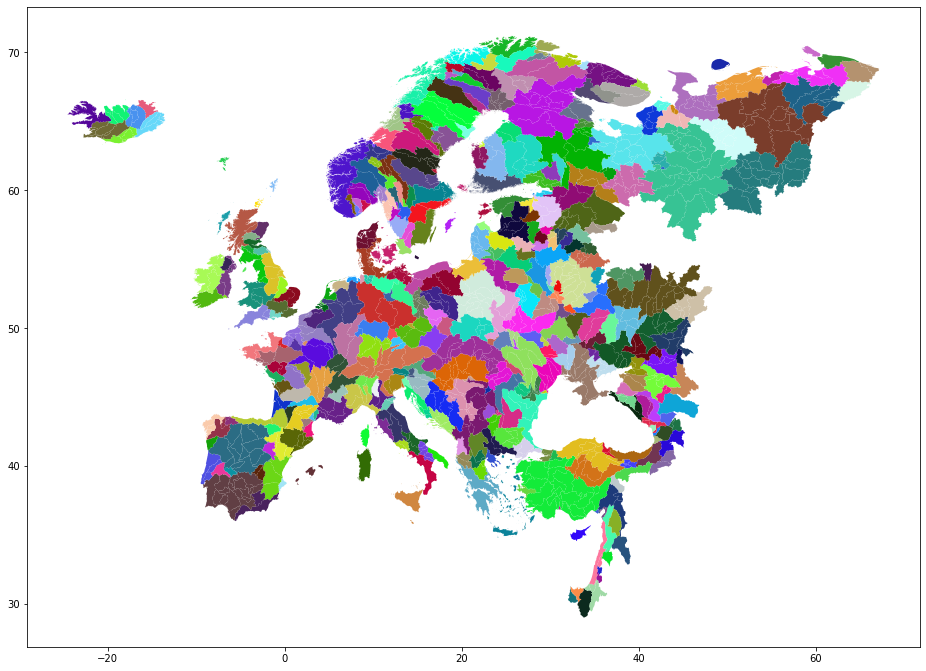

In [30]:
plot_clusters_shp(shp_august_noNA, clusters_corr09, figsize=(16,16))

In [32]:
clusters_complete_corr08 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.8)

Computing neighbours strengths...


  0%|          | 0/2967 [00:00<?, ?it/s]

100%|██████████| 2967/2967 [00:01<00:00, 1626.82it/s]


Neighbours strengths computed.
Computing clusters...


  0%|          | 0/1139 [03:40<?, ?it/s]3.66it/s]
1583it [00:40, 39.41it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 277
No. singletons = 82


100%|██████████| 1139/1139 [00:04<00:00, 260.09it/s]


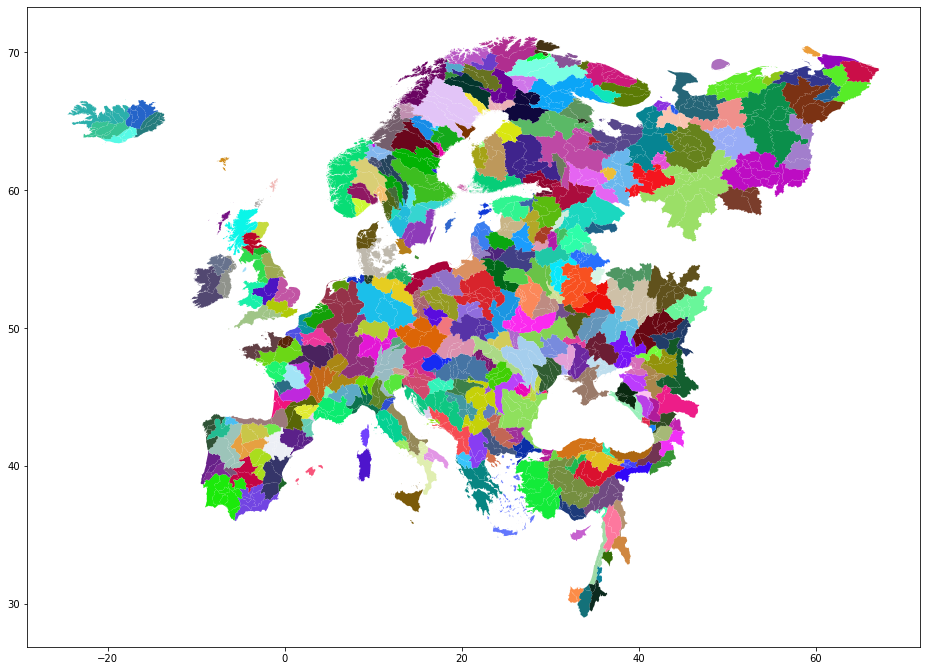

In [33]:
plot_clusters_shp(shp_august_noNA, clusters_complete_corr08, figsize=(16,16))

In [34]:
clusters_complete_corr085 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.85)

Computing neighbours strengths...


100%|██████████| 2967/2967 [00:02<00:00, 1444.56it/s]


Neighbours strengths computed.
Computing clusters...


1732it [00:58, 29.53it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 320
No. singletons = 131


100%|██████████| 1139/1139 [00:06<00:00, 164.43it/s]


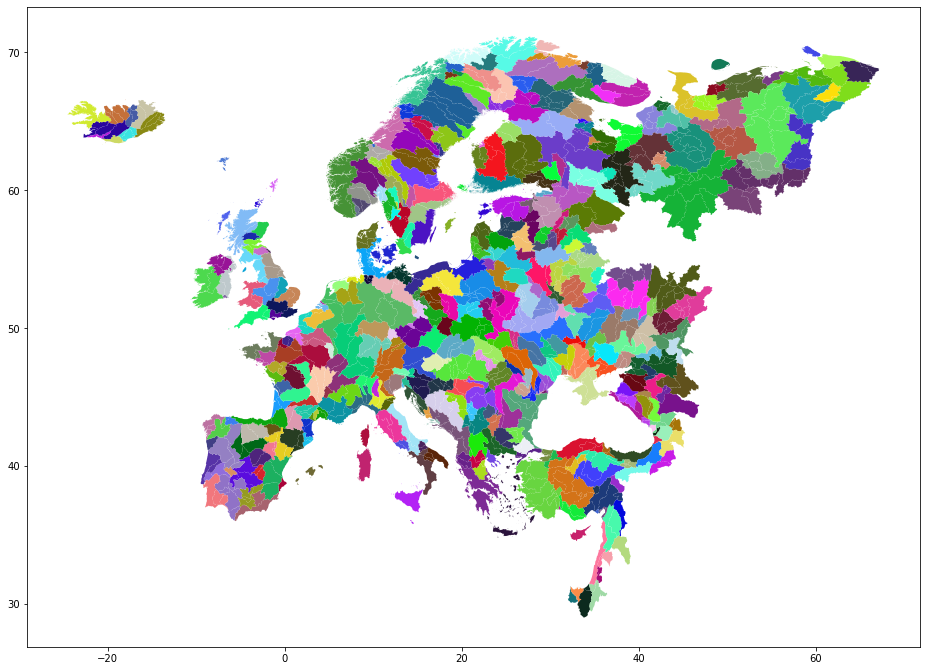

In [35]:
plot_clusters_shp(shp_august_noNA, clusters_complete_corr085, figsize=(16,16))

In [36]:
clusters_complete_corr09 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 2967/2967 [00:01<00:00, 1658.42it/s]


Neighbours strengths computed.
Computing clusters...


1992it [00:16, 118.99it/s]                        

Clusters computed.


No. clusters (w/o singletons) = 349
No. singletons = 250


100%|██████████| 1139/1139 [00:04<00:00, 230.46it/s]


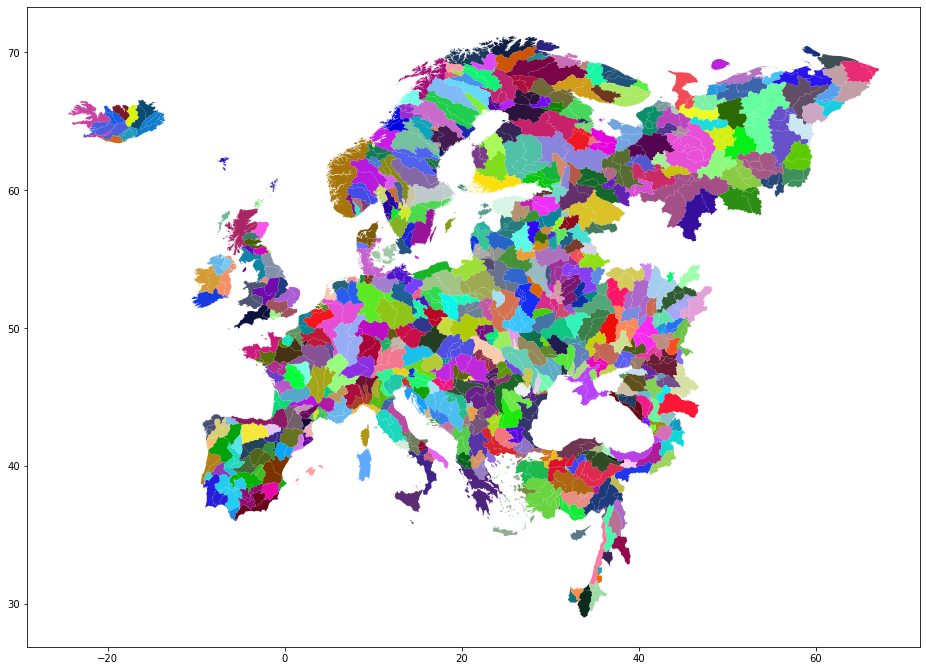

In [37]:
plot_clusters_shp(shp_august_noNA, clusters_complete_corr09, figsize=(16,16))